# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv(r'D:/DataLovesAcademy/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [3]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [4]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

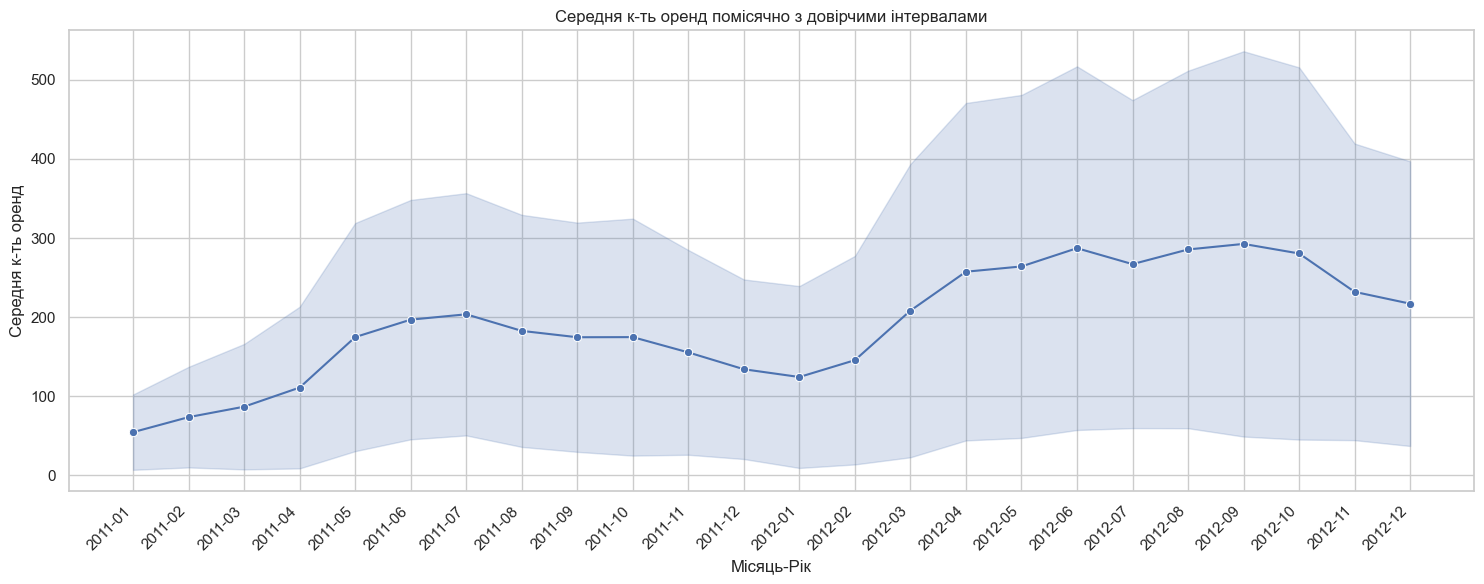

In [5]:
plt.figure(figsize=(15, 6))

sns.lineplot(
    data=df, 
    x='month_year', 
    y='count', 
    marker='o', 
    errorbar='sd')
plt.title('Середня к-ть оренд помісячно з довірчими інтервалами')
plt.xlabel('Місяць-Рік')
plt.ylabel('Середня к-ть оренд')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Питання для інтерпретації:
В які місяці найбільша невизначеність в даних? => я б зазначила прям діапазоном з квітня 2012 по грудень 2012. Саме в цьому діапазоні в кожному місяці дані були доволі розкиданими в порівнянні до середнього значення. Але в цьому діапазоні найневизначеним місяцем є вересень 2012, а потім червень та жовтень

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

Text(0, 0.5, 'Частота')

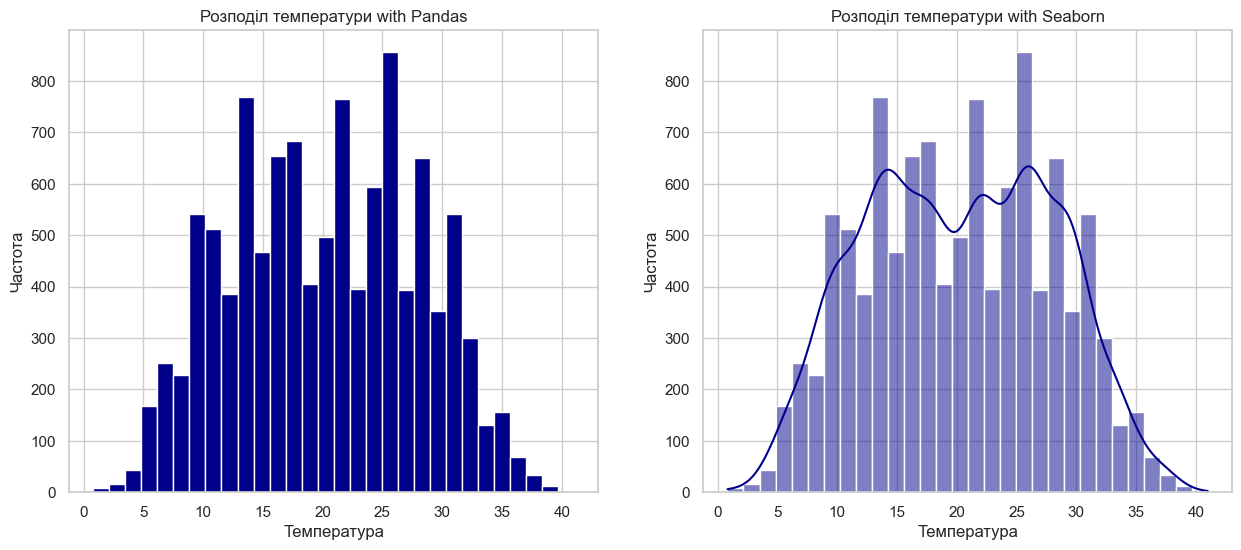

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
bins_count = 30 
df['temp'].plot(kind='hist', ax=axes[0], bins=bins_count, edgecolor='white', color='darkblue')
axes[0].set_title('Розподіл температури with Pandas')
axes[0].set_xlabel('Температура')
axes[0].set_ylabel('Частота')

sns.histplot(df['temp'], ax=axes[1], bins=bins_count, kde=True, color='darkblue')
axes[1].set_title('Розподіл температури with Seaborn')
axes[1].set_xlabel('Температура')
axes[1].set_ylabel('Частота')

Яка візуальна різниця між Pandas та Seaborn гістограмами? - якщо проігнорувати новий параметр kde=True, то відмінностей не бачу. Єдине, що в Пандас довелося додавати параметр edgecolor='white', який відокремлює кожен стовпчик і не зливає все в одне, а в Сіборне це робиться автоматично. І не дивлячись на те, що я задала однаковий колів, в кожній з бібліотек він відображається по різному.

Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами? - це Kernel Density Estimate. Вона показує ту саму гістограму, але у згладженому вигляді. Тобто вона нівелює дрібні зміни і показує загальну картину розподілу. За допомогою цієї лінії ми чітко бачимо два найвищі Горби/Піки, що вказує на бімодальний розподіл температури. Тобто люди найчастіше користуются веліками, коли температура в приблизно 15 градусів і коли спека від 25 до 30. 
Ще ця лінія дуже схожа на Bell Curve

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

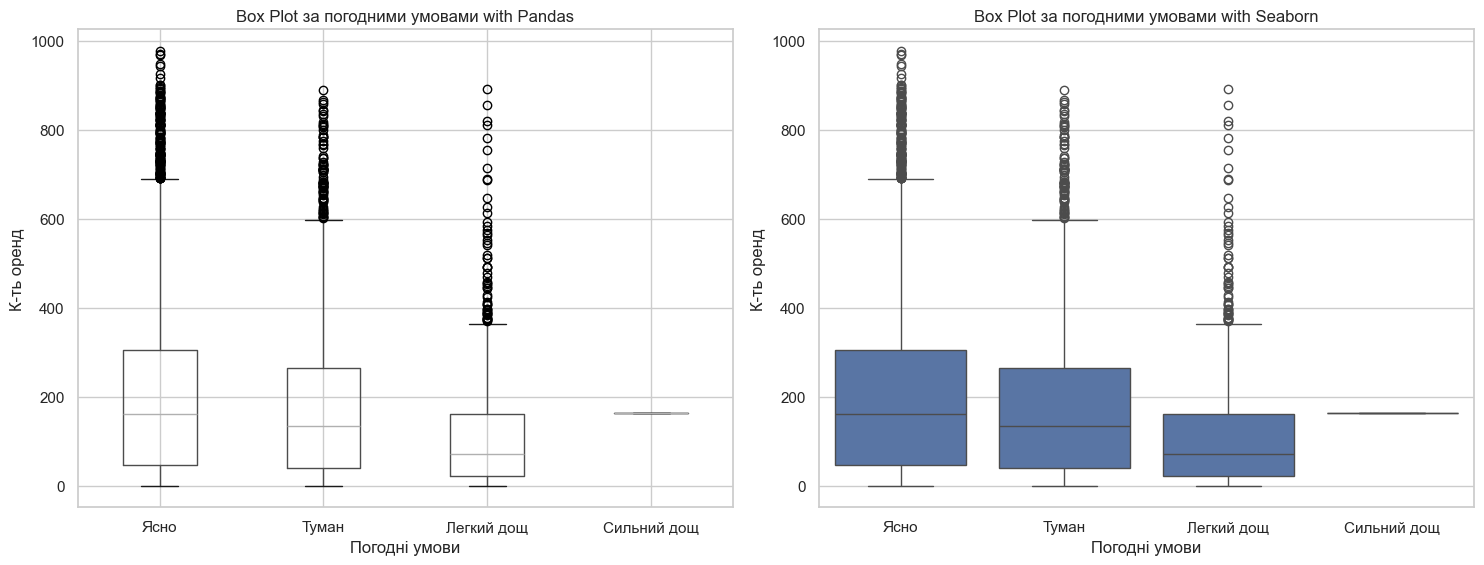

In [7]:
# словник для заміни числових значень погоди на текстові
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'}

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

df.boxplot(column='count', by='weather', ax=axes[0])
axes[0].set_title('Box Plot за погодними умовами with Pandas')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('К-ть оренд')
axes[0].set_xticklabels([weather_labels[x] for x in sorted(df['weather'].unique())])
plt.suptitle('')

sns.boxplot(x='weather', y='count', data=df, ax=axes[1])
axes[1].set_xticks(range(len(df['weather'].unique())))
axes[1].set_xticklabels([weather_labels[x] for x in sorted(df['weather'].unique())])
axes[1].set_title('Box Plot за погодними умовами with Seaborn')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('К-ть оренд')

plt.tight_layout()
plt.show()

Яка візуальна різниця між Pandas та Seaborn бокс-плотами? - для мене СІборн виглядає просто стильовіше/сучасніше і все

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [8]:
# Вибір числових колонок
matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
matrix

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


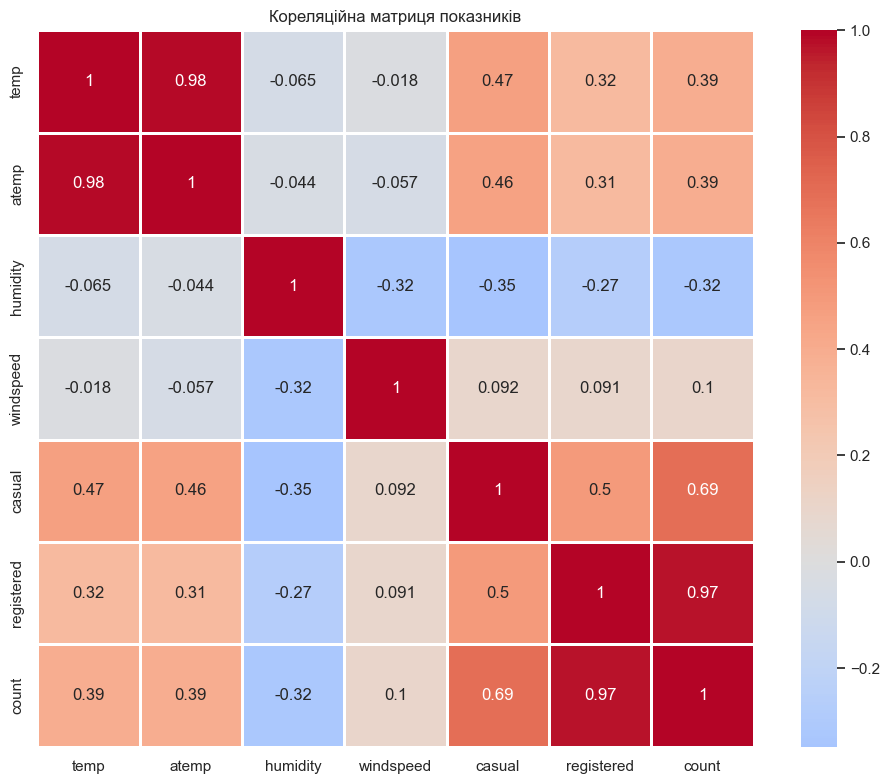

In [9]:
plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1)

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

Дайте відповіді на питання по графіку:

Які змінні найсильніше корелюють з загальною кількістю оренди (count)? - Register and casual
Яка кореляція між temp та atemp? Чому? - пряма, сильна, позитивна. Тому що описують майже одне те саме. Реальну температуру і як ця температура відчувається людиною. Тобто описуємо одне тей саме але з різних сторін.
Які змінні мають негативну кореляцію? - всі змінні, що мають "мінус". Найнегативніша кореляція спостерінається між casual та humidity (-0.35). Значить, що  чим вища вологість, тим нижча к-ть випадкових користувачів

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


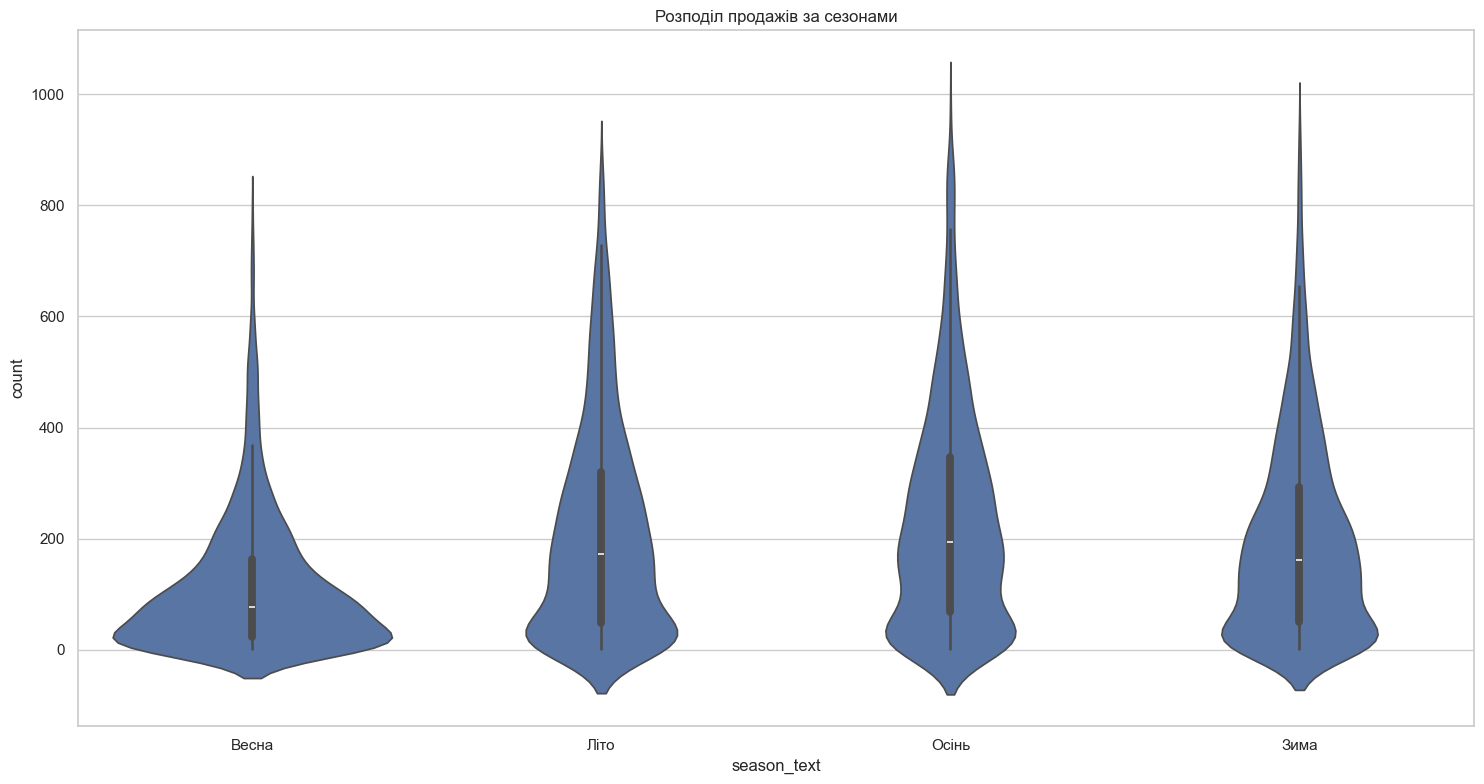

In [10]:
season_labels = {
    1: 'Весна',
    2: 'Літо',
    3: 'Осінь',
    4: 'Зима'}

# Створення нової колонки з текстовими назвами сезонів
df['season_text'] = df['season'].map(season_labels)
plt.figure(figsize=(15, 8))
sns.violinplot( data=df, x='season_text', y='count')
plt.title('Розподіл продажів за сезонами')
plt.tight_layout()
plt.show()

Питання для інтерпретації:

Що показує "товщина" violin plot? - це щільність розподілу. Чим товше, тим більше значень зосереджено в цьому "товстому" місці
В якому сезоні найбільша варіабельність оренди? - восени, бо ця скрипка найдовша/найвища та найширша/найрозмашиста.
Яка перевага violin plot над звичайним box plot? - violin це як повна картина розподілу із зазначенням не тільки ключових точок, а ще й побачити і сам розподіл аби одразу розуміти який він

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

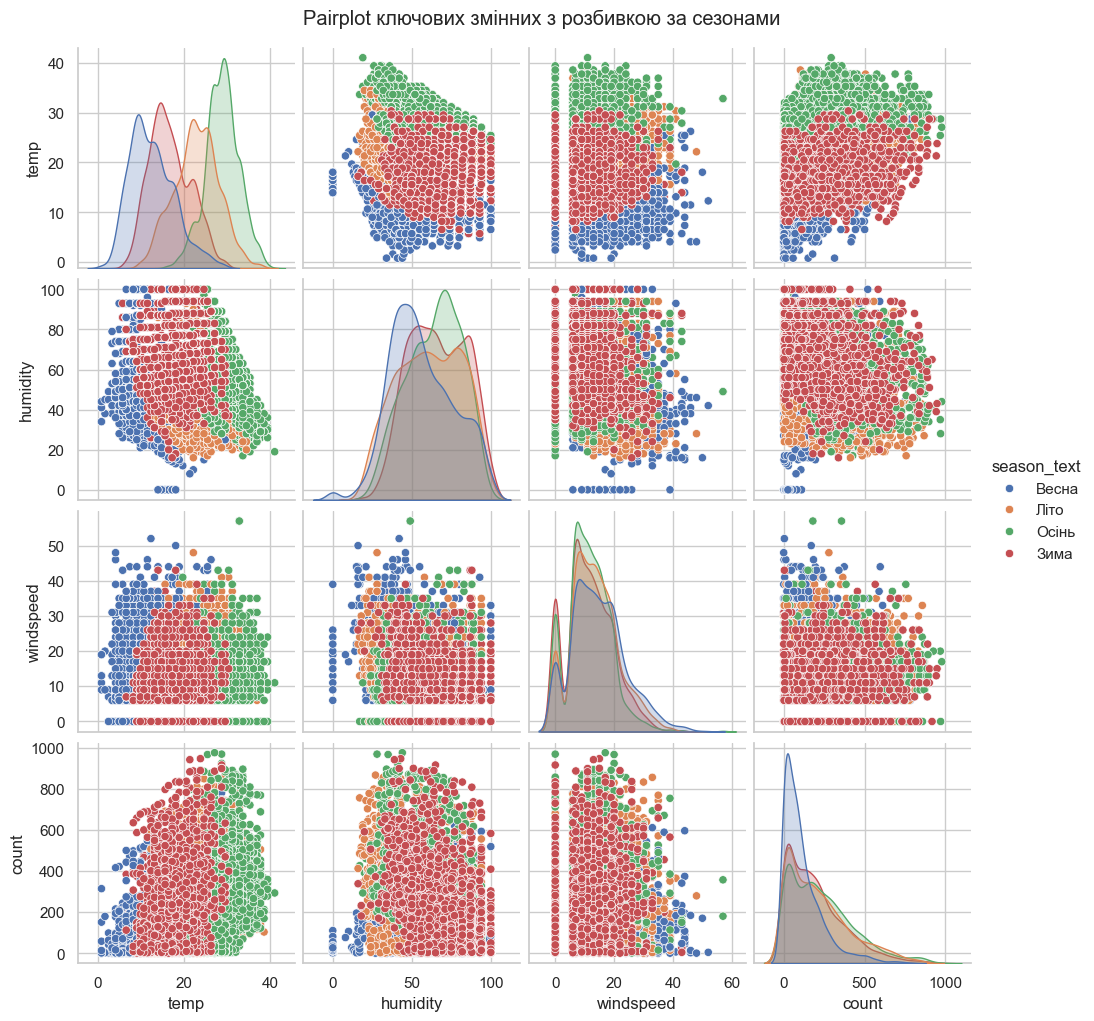

In [22]:
season_labels = {
    1: 'Весна',
    2: 'Літо',
    3: 'Осінь',
    4: 'Зима'
}
df['season_text'] = df['season'].map(season_labels)

# Вибір змінних для pairplot
sample_df = df[['temp', 'humidity', 'windspeed', 'count','season_text']]
sns.pairplot(sample_df,hue='season_text' )

plt.suptitle('Pairplot ключових змінних з розбивкою за сезонами', y=1.02)
plt.show()

Питання для інтерпретації:
Яка характеристика найбільше змінюється від сезону? - це к-ть орендованих велосипедів
Між якими змінними спостерігається найсильніший лінійний зв'язок? - між температурою і к-тю оренд

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

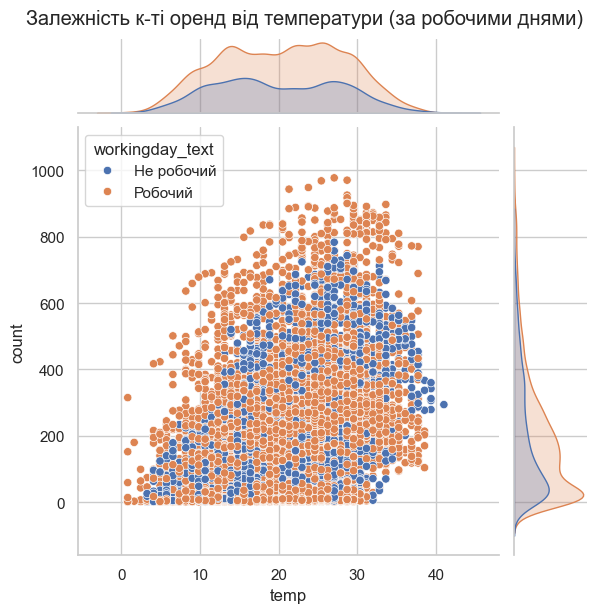

In [26]:
day_labels = {
    1: 'Робочий',
    0: 'Не робочий'}
df['workingday_text'] = df['workingday'].map(day_labels)
sns.jointplot(x='temp', y='count', data=df, hue='workingday_text')
plt.suptitle('Залежність к-ті оренд від температури (за робочими днями)', y=1.02)
plt.show()

Питання для інтерпретації:

Що показують графіки по краях? - показують розподіл кожної окремої змінної. Так ми бачимо, які значення температури та кількості оренди є найпоширенішими в даних, з розбивкою за категоріями.
Чи є різниця у поведінці користувачів у робочий і неробочий день? - так! у Робочі дні (помаранчевий) розподіл кількості оренд є значно ширшим та зміщеним у бік високих значень. Це означає, що люди частіше орендують велосипеди, і кількість оренд є значно вищою. 